In [56]:
import numpy as np

In [6]:
import joblib
import tensorflow as tf

# Load the TensorFlow model from the pickle file
with open('models/mobilenet.pkl', 'rb') as f:
    loaded_model = joblib.load(f)

In [7]:
# Convert the loaded model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(loaded_model)

In [8]:
converter.optimizations = [tf.lite.Optimize.DEFAULT]

In [9]:
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: C:\Users\DARIN\AppData\Local\Temp\tmp56wl6yr3\assets


INFO:tensorflow:Assets written to: C:\Users\DARIN\AppData\Local\Temp\tmp56wl6yr3\assets


In [10]:
len(tflite_model)

2683288

In [12]:
with open('models/mobilenetv2_float.tflite', 'wb') as f:
    f.write(tflite_model)

In [15]:
interpreter = tf.lite.Interpreter(model_path='models/mobilenetv2_float.tflite')
interpreter.allocate_tensors()

In [16]:
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [17]:
x_test_scaled = np.load(r'numpy_arrays/train_test_splitted/x_test_scaled.npy')
y_test = np.load(r'numpy_arrays/train_test_splitted/y_test.npy')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [18]:
x_test_scaled.shape

(2251, 224, 224, 3)

In [21]:
x_test_scaled[0].shape

(224, 224, 3)

In [23]:
x_test_scaled[0].reshape(1,224,224,3)

array([[[[0.0008609 , 0.00083015, 0.00081477],
         [0.000846  , 0.00082563, 0.00079541],
         [0.00082037, 0.00080344, 0.00076   ],
         ...,
         [0.00084906, 0.00082114, 0.00079426],
         [0.00082917, 0.000811  , 0.00075788],
         [0.00084474, 0.00082303, 0.00078052]],

        [[0.00080262, 0.00077187, 0.00075649],
         [0.00083199, 0.00080682, 0.00078306],
         [0.00085107, 0.00083383, 0.00078125],
         ...,
         [0.00088107, 0.00086059, 0.00081437],
         [0.00084651, 0.00081944, 0.00079299],
         [0.00086286, 0.0008393 , 0.00079937]],

        [[0.0008238 , 0.00079304, 0.00077766],
         [0.00084321, 0.00081245, 0.00079707],
         [0.00087926, 0.00084851, 0.00083313],
         ...,
         [0.00090605, 0.00087943, 0.00085263],
         [0.00089338, 0.00086262, 0.00084724],
         [0.00088385, 0.00085524, 0.00083986]],

        ...,

        [[0.00072627, 0.00073498, 0.00071755],
         [0.00073262, 0.00073612, 0.00072913]

In [34]:
interpreter.set_tensor(input_details[0]['index'],x_test_scaled[15].reshape(1,224,224,3))

In [35]:
interpreter.invoke()

In [36]:
output_details = interpreter.get_output_details()
output_data = interpreter.get_tensor(output_details[0]['index'])

In [37]:
output_data

array([[0.53373915]], dtype=float32)

In [38]:
y_test[15]

0

In [89]:
from cv2 import COLOR_BGR2RGB

In [90]:
def predict(n):
    interpreter.set_tensor(input_details[0]['index'],x_test_scaled[n].reshape(1,224,224,3))
    interpreter.invoke()
    output_details = interpreter.get_output_details()
    output_data = interpreter.get_tensor(output_details[0]['index'])
    print('predicted:',output_data[0][0],'actual:',y_test[n])
    augmented_image = ((x_test_scaled[n])*255).astype(np.uint8)
    plt.imshow(cv2.cvtColor(augmented_image,cv2.COLOR_BGR2RGB))
    plt.axis("off")

predicted: 0.99167943 actual: 1


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

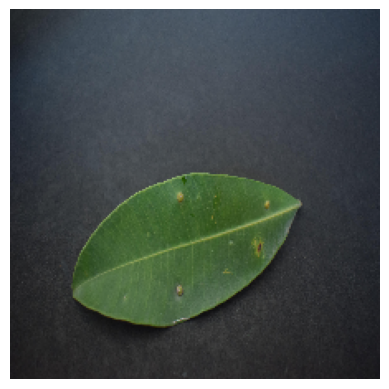

In [96]:
predict(1862)

In [ ]:
y_predicted=[]
for n in range(len(x_test_scaled)):
    interpreter.set_tensor(input_details[0]['index'],x_test_scaled[n].reshape(1,224,224,3))
    interpreter.invoke()
    output_details = interpreter.get_output_details()
    output_data = interpreter.get_tensor(output_details[0]['index'])
    y_predicted.append(output_data)